In [ ]:
Урок 19-1.
Исследовательский анализ данных
(EDA). Первый взгляд на данные


In [ ]:
Основные этапы EDA
A. Загрузка и первоначальная проверка данных
B. Очистка и преобразование данных
С. Одномерный анализ
D. Двумерный анализ
Е. Визуализация
Порядок этапов может меняться в зависимости от исследуемого набора данных. В
том числе, мы можем возвращаться к уже пройденным этапам и повторять их
повторно.


In [ ]:
Чтобы продемонстрировать этот процесс, возьмем набор данных с информацией о
подержанных автомобилях. Цель – на основе этих данных построить модель для
прогнозирования цен подержанных автомобилей. Само по себе создание модели –
отдельный сложный процесс определения вклада каждого фактора в финальную
цену. Но прежде чем приступить к этому процессу, нужно понять, какие факторы
имеют влияние на цену, а какие вообще не нужно, нельзя или невозможно включить
в модель. Собственно, это и есть основной результат, который мы хотели бы
получить в результате исследовательского анализа данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("used_cars_data.csv")

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
Дополнительно можно вывести количество отсутствующих значений в каждом
столбце.

In [6]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
Далее посмотрим количество уникальных значений в каждом столбце. Так мы
можем идентифицировать непрерывные и категориальные столбцы в данных.

In [7]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [ ]:
Кроме того, стоит проверить, нет ли в наших данных полностью повторяющихся
строк. Лишние дубликаты часто возникают при объединении данных из разных
источников. Дублированные строки могут быть обработаны или удалены на основе
дальнейшего анализа.


In [8]:
data[data.duplicated()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [ ]:
Видим, что в нашем датасете все строки уникальны.

In [4]:
(data.isnull().sum()/(len(data)))*100 #процент отсутствующих значений

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [ ]:
Некоторые столбцы можно исключить, если они не приносят пользы нашему
анализу. В нашем наборе данных столбец S.No содержит только значения
идентификатора, и он не влияет на прогнозирование зависимой переменной.

In [5]:
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
data[data.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


In [7]:
data[data.duplicated(keep=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


In [8]:
data = data.drop_duplicates()

In [9]:
data[data.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [ ]:
С другой стороны, исходя из знаний предметной области, иногда имеет смысл
преобразовать необработанные данные и создать на их основе новые признаки,
более релевантные при создании прогнозной модели с использованием машинного
обучения или статистического моделирования.
В нашем наборе данных стоит обратить внимание на столбцы Year и Name.
Очевидно, что для оценки автомобиля нам полезнее знать его возраст, а не год
выпуска. Эти величины взаимозависимы и одинаково полезны для модели, но
возраст будет давать более наглядные результаты. Создадим новый столбец
«Car_Age».

In [10]:
from datetime import date

date.today().year
data.loc[:,'Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


In [ ]:
Далее можно предположить, что названия автомобилей не будут хорошим
предиктором цены. Скорее, большее влияние может оказывать марка автомобиля, а
не конкретная модель. Мы можем обработать этот столбец и сделать его более
информативным. Давайте разделим его на два столбца – «Бренд» и «Модель».


In [11]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
2573,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Mumbai,2008,70700,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,8.0,NaN,4.75,17,Toyota,Innova2.5
1006,Tata Indigo CS eVX,Jaipur,2016,65000,Diesel,Manual,First,25.0 kmpl,1396 CC,69.01 bhp,5.0,NaN,2.80,9,Tata,IndigoCS
6601,Hyundai Verna VTVT 1.6 SX,Delhi,2014,70428,Petrol,Manual,First,17.0 kmpl,1591 CC,121.3 bhp,5.0,11.47 Lakh,NaN,11,Hyundai,VernaVTVT
6564,Hyundai Elantra CRDi SX,Bangalore,2014,72017,Diesel,Manual,First,22.7 kmpl,1582 CC,126.24 bhp,5.0,NaN,NaN,11,Hyundai,ElantraCRDi
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh,NaN,9,Tata,Tiago1.05
1970,Ford EcoSport 1.5 TDCi Titanium,Kochi,2017,30453,Diesel,Manual,First,22.77 kmpl,1498 CC,98.59 bhp,5.0,NaN,8.45,8,Ford,EcoSport1.5
1129,Maruti Ertiga SHVS VDI,Ahmedabad,2018,38000,Diesel,Manual,First,24.52 kmpl,1248 CC,88.5 bhp,7.0,NaN,8.70,7,Maruti,ErtigaSHVS
1231,Mahindra XUV500 W4,Bangalore,2014,65213,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,9.45,11,Mahindra,XUV500W4
4568,Hyundai i20 Asta 1.4 CRDi,Hyderabad,2012,80000,Diesel,Manual,First,21.27 kmpl,1396 CC,88.76 bhp,5.0,NaN,4.50,13,Hyundai,i20Asta
4933,BMW X5 xDrive 30d,Chennai,2011,55000,Diesel,Automatic,Second,11.7 kmpl,2993 CC,245 bhp,5.0,NaN,28.00,14,BMW,X5xDrive


In [ ]:
Наконец, на последнем этапе преобразования данных необходимо
проанализировать соответствие данных типам столбцов. Такие неточности в данных
часто возникают из-за ошибок в процессе создания датасета. Например, столбцы с
целочисленными значениями могут иметь тип float64, столбцы с действительными
значениями могут быть записаны как строки. А категориальные столбцы могут
содержать названия категорий с опечатками. Все подобные проблемы нужно
идентифицировать и исправить.
Изучим столбец “Brand”:


In [12]:
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [ ]:
Видим ошибки, которые возникли при заполнении и при отделении марки от модели.
Их нужно исправить.

In [13]:
data["Brand"] = data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"})

In [ ]:
После этого исходный столбец Name можно удалить

In [14]:
del data['Name']

In [15]:
# data[data['Brand']=='OpelCorsa']['Model']='Corsa'
data.loc[data['Brand']=='OpelCorsa','Model']='Corsa'
data.loc[data['Brand']=='OpelCorsa','Brand'] ='Opel'
data[data['Brand']=='Opel']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
7067,Hyderabad,2005,50000,Petrol,Manual,Second,14.2 kmpl,1389 CC,88 bhp,5.0,NaN,NaN,20,Opel,Corsa


In [ ]:
Следующую проблему с типами данных можно заметить со столбцами Mileage,
Engine, Power, New_Price – они содержат числовые значения с единицами
измерения. В таком виде данные не удастся использовать не только для
дальнейшего моделирования, но и для вычисления статистических характеристик.
Точно так же, как название автомобиля, мы можем разделить эти столбцы на две
компоненты и выделить числовую.

In [16]:
data['Mileage_num'] = data.Mileage.str.split().str.get(0)
data['Mileage_units'] = data.Mileage.str.split().str.get(1)
data['Mileage_num'] = data['Mileage_num'].astype(float)
data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_num,Mileage_units
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15,Maruti,WagonR,26.60,km/kg
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10,Hyundai,Creta1.6,19.67,kmpl
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14,Honda,JazzV,18.20,kmpl
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13,Maruti,ErtigaVDI,20.77,kmpl
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12,Audi,A4New,15.20,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN,14,Volkswagen,VentoDiesel,20.54,kmpl
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN,10,Volkswagen,PoloGT,17.21,kmpl
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN,13,Nissan,MicraDiesel,23.08,kmpl
7251,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN,12,Volkswagen,PoloGT,17.20,kmpl


In [17]:
print(data.Mileage_units.unique())
print(data.isnull().sum())
print(data.info())

['km/kg' 'kmpl' nan]
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6246
Price                1233
Car_Age                 0
Brand                   0
Model                   0
Mileage_num             2
Mileage_units           2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null 

In [18]:
data['Mileage'] = data['Mileage_num']*(1+0.333*(data['Mileage_units']=='km/kg'))
del data['Mileage_num']
del data['Mileage_units']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null   float64
 7   Engine             7206 non-null   object 
 8   Power              7206 non-null   object 
 9   Seats              7199 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Car_Age            7252 non-null   int64  
 13  Brand              7252 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 906.5+ KB
None


In [ ]:
1. Как проверить, что в категориальных столбцах Fuel_Type, Transmission,
Owner_Type нет опечаток? Сделайте это.

In [19]:
print(data.Fuel_Type.unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [20]:
print(data.Transmission.unique())

['Manual' 'Automatic']


In [21]:
print(data.Owner_Type.unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
Столбец “Seats” – количество мест в автомобиле – имеет тип float64.
Корректно ли это? Нужно ли его преобразовать к целочисленному типу?
Возможно ли это?

In [22]:
print(data.Seats.unique())

[ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]


In [23]:
data[data.Seats.isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,18,Honda,City1.5
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,15,Maruti,Swift1.3
229,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498 CC,99 bhp,NaN,NaN,3.60,10,Ford,FigoDiesel
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,19,Maruti,Swift1.3
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,17,Land Rover,RoverRange
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,16,Honda,City1.3
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10,Maruti,Swift1.3
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,21,Honda,City1.5
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,17,Land Rover,RoverRange
1917,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493 CC,100 bhp,NaN,NaN,1.70,20,Honda,City1.5


In [36]:
data['Seats']= data['Seats'].replace(0, np.nan)
print(data.Seats.unique())
data['Seats']=data.groupby(['Brand','Model'])['Seats'].transform(lambda x: x.fillna(x.max()))

[ 5.  7.  8.  4.  6.  2. nan 10.  9.]


In [24]:
len(data[data.Seats.isnull()])

53

In [ ]:
Приведите столбцы Engine, Power, New_Price к числовым типам. Проверьте,
требуется ли унификация единиц измерения.

In [25]:
data['Engine_num'] = data.Engine.str.split().str.get(0)
data['Engine_units'] = data.Engine.str.split().str.get(1) 
data['Engine_num'] = data['Engine_num'].astype(float)
print(data.Engine_units.unique())

['CC' nan]


In [26]:
data['Engine'] = data['Engine_num']
del data['Engine_num']
del data['Engine_units']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null   float64
 7   Engine             7206 non-null   float64
 8   Power              7206 non-null   object 
 9   Seats              7199 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Car_Age            7252 non-null   int64  
 13  Brand              7252 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 906.5+ KB
None


In [28]:
data['Power_num'] = data.Power.str.split().str.get(0)
data['Power_units'] = data.Power.str.split().str.get(1) 
data['Power_num'] = data['Power_num'].replace({'null':np.nan})
data['Power_num'] = data['Power_num'].astype(float)
print(data.Power_units.unique())
print(data.Power_num.unique())

['bhp' nan]
[ 58.16  126.2    88.7    88.76  140.8    55.2    63.1   171.5   103.6
  74.    103.25  116.3   187.7   115.    175.56   98.6    83.8   167.62
 190.     88.5   177.01   80.     67.1   102.    108.45  138.1   184.
 179.5   103.5    64.     82.    254.8    73.9    46.3    37.5    77.
  82.9   149.92  138.03  112.2   163.7    71.    105.    174.33   75.
 103.2    53.3    78.9   147.6   147.8    68.    186.    170.     69.
 140.     78.    194.    500.    108.5    86.8   187.74      nan 132.
  86.7    73.94  117.3   218.    168.5    89.84  110.     90.     82.85
  67.    241.4    35.    270.9   126.32   73.    130.    100.6   150.
  75.94  215.    107.3    37.48  120.    178.    152.     91.1    85.8
 362.07  121.3   143.     81.8   171.     76.8   103.52  444.    362.9
  67.06  120.7   258.     81.86  112.     88.73   57.6   157.75  102.5
 201.1    83.1    68.05  106.    100.     81.83   85.     64.1   177.5
 246.7   177.46   65.     67.04  189.08   99.     53.5   194.3    70.

In [29]:
data['Power'] = data['Power_num']
del data['Power_num']
del data['Power_units']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null   float64
 7   Engine             7206 non-null   float64
 8   Power              7077 non-null   float64
 9   Seats              7199 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Car_Age            7252 non-null   int64  
 13  Brand              7252 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 906.5+ KB
None


In [31]:
data['New_Price_num'] = data.New_Price.str.split().str.get(0)
data['New_Price_units'] = data.New_Price.str.split().str.get(1) 
# data['Power_num'] = data['Power_num'].replace({'null':np.nan})
data['New_Price_num'] = data['New_Price_num'].astype(float)
print(data.New_Price_units.unique())
# print(data.Power_num.unique())

[nan 'Lakh' 'Cr']


In [32]:
data['New_Price'] = data['New_Price_num']*(1+99*(data['New_Price_units']=='Cr'))
del data['New_Price_num']
del data['New_Price_units']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null   float64
 7   Engine             7206 non-null   float64
 8   Power              7077 non-null   float64
 9   Seats              7199 non-null   float64
 10  New_Price          1006 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7252 non-null   int64  
 13  Brand              7252 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 906.5+ KB
None


In [33]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250.0,NaN,NaN,NaN,18.224505,4.779855,0.0,15.26,18.195,21.1,44.70882
Engine,7206.0,NaN,NaN,NaN,1616.590064,595.324779,72.0,1198.0,1493.0,1968.0,5998.0
Power,7077.0,NaN,NaN,NaN,112.764474,53.497297,34.2,75.0,94.0,138.1,616.0
Seats,7199.0,NaN,NaN,NaN,5.279761,0.811709,0.0,5.0,5.0,5.0,10.0


In [34]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Age']


Year


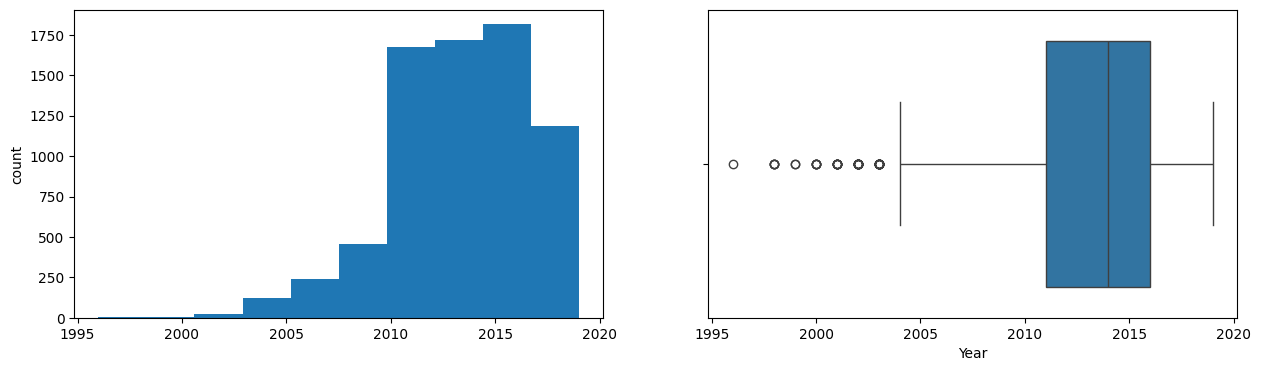

Kilometers_Driven


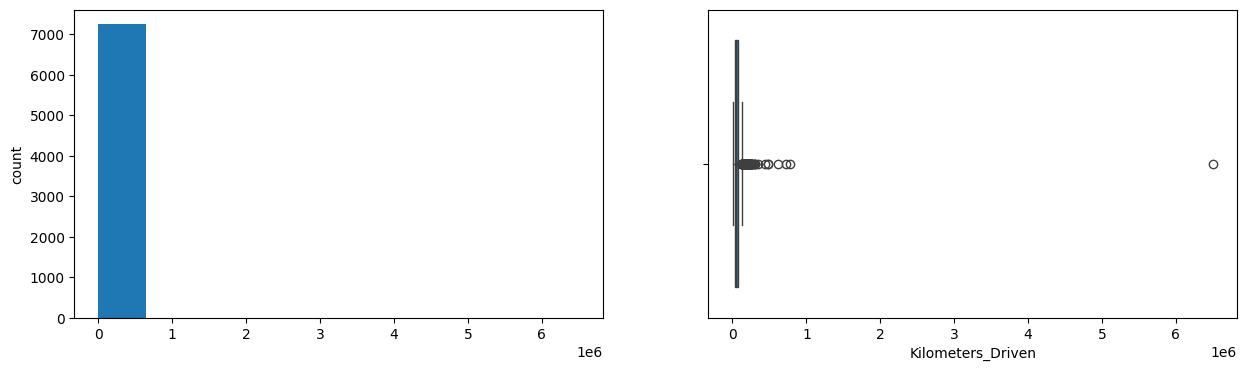

Mileage


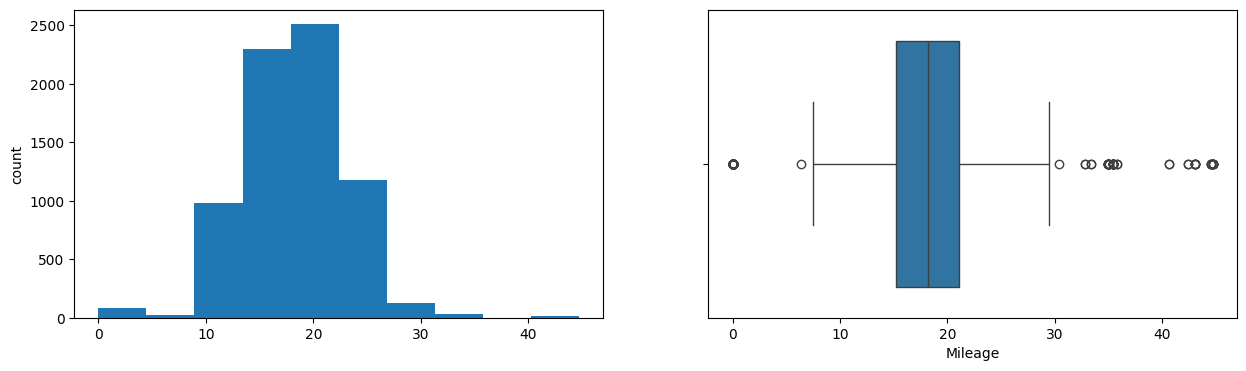

Engine


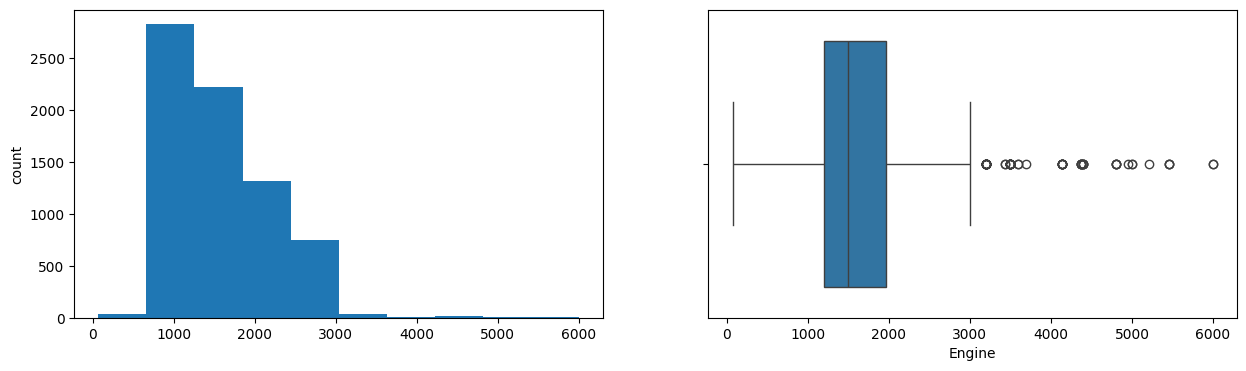

Power


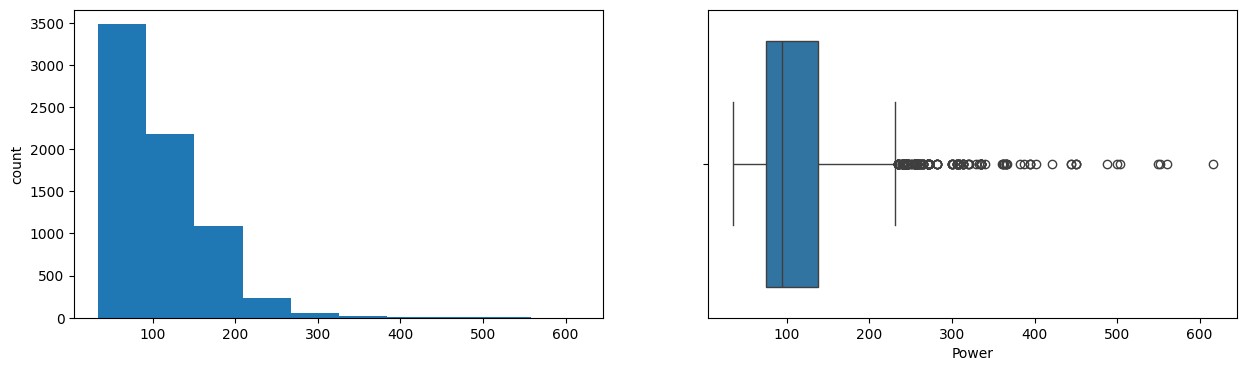

Seats


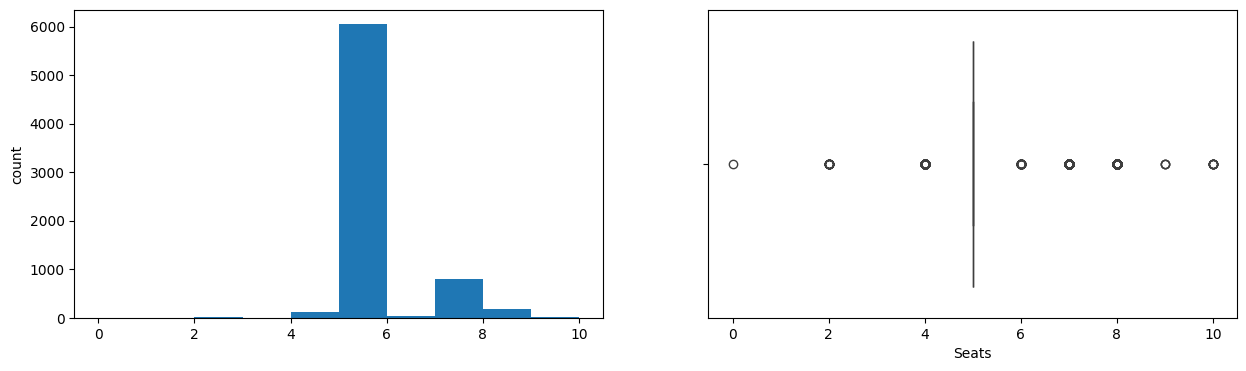

New_Price


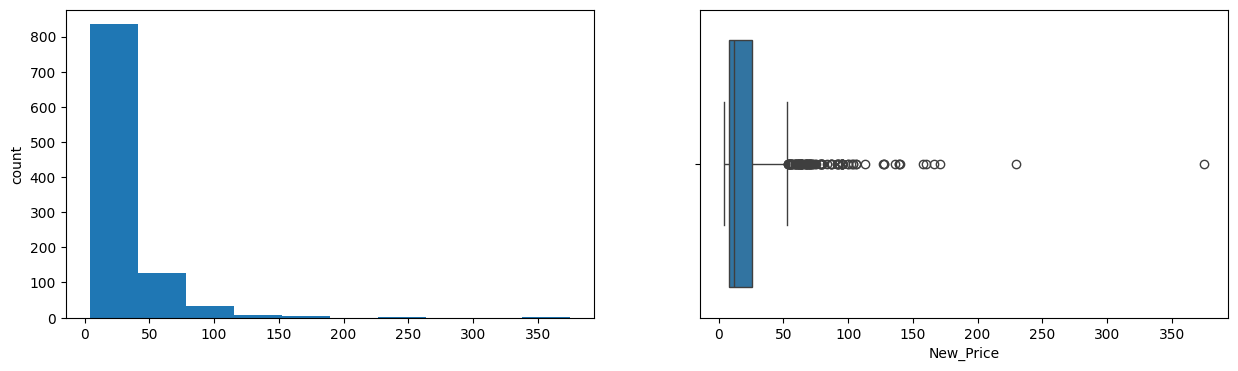

Price


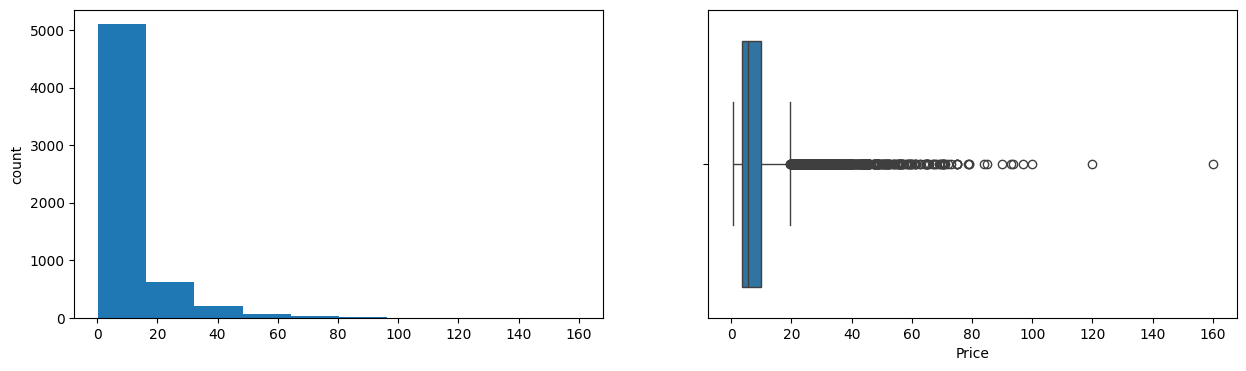

Car_Age


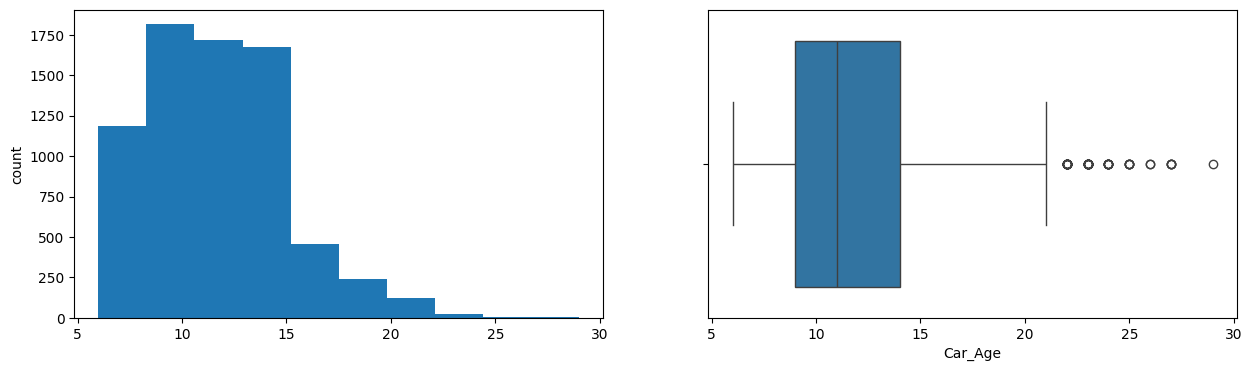

In [35]:
for col in num_cols:
 print(col)
 plt.figure(figsize = (15, 4))
 plt.subplot(1, 2, 1)
 data[col].hist(grid=False)
 plt.ylabel('count')
 plt.subplot(1, 2, 2)
 sns.boxplot(x=data[col])
 plt.show()

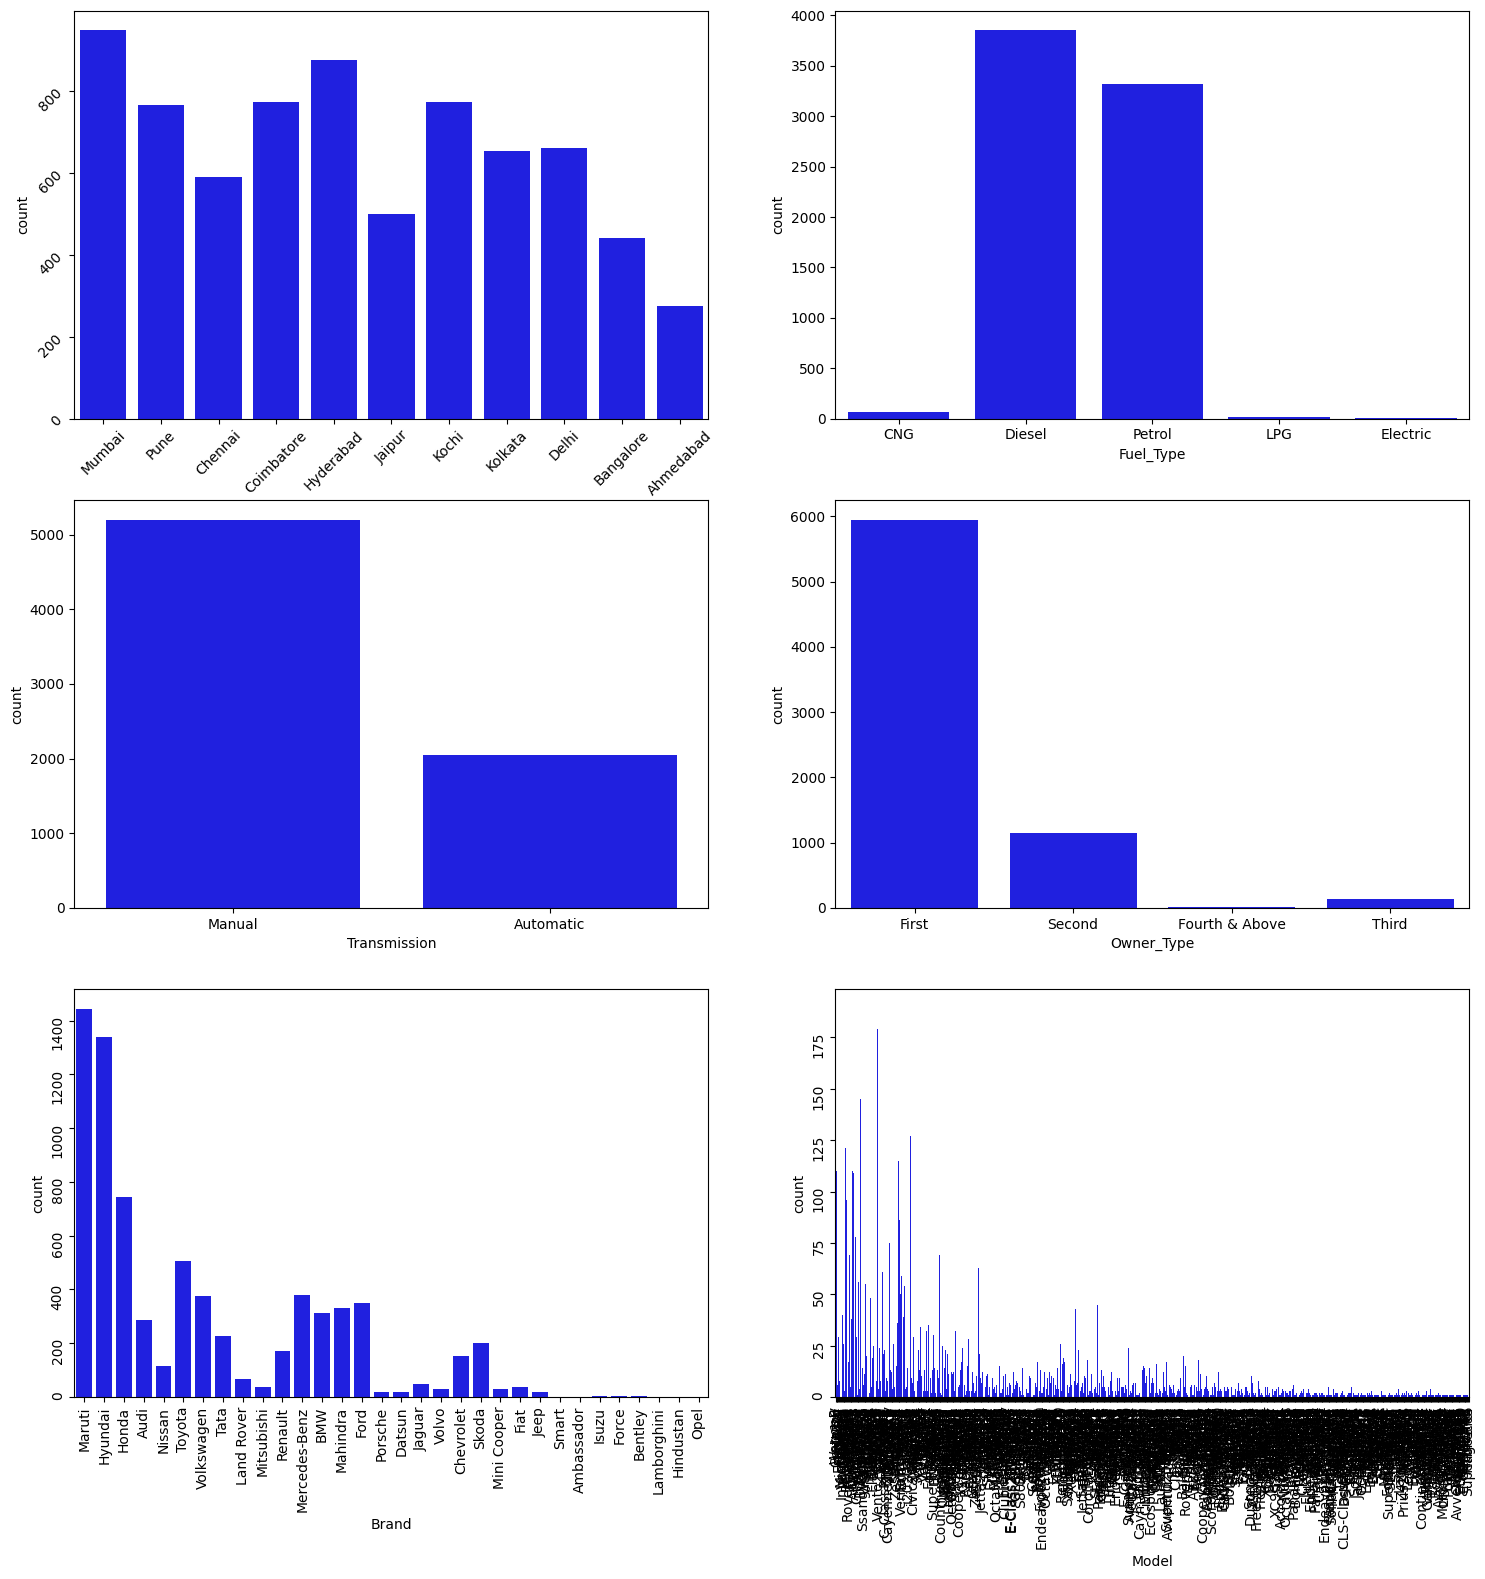

In [39]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
for i in range(len(cat_cols)):
 sns.countplot(ax = axes[i//2, i%2], x = cat_cols[i], data = data, color = 'blue')
axes[0][0].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)
plt.show()

In [ ]:
Логарифмическое преобразование - статистический метод, применяемый для предобработки
данных, который помогает улучшить их аналитическую
обрабатываемость. Преобразование заключается в
применении логарифма к каждому значению переменной.

In [41]:
for colname in ['Kilometers_Driven','Price']:
 data[colname + '_log'] = np.log1p(data[colname])

Kilometers_Driven


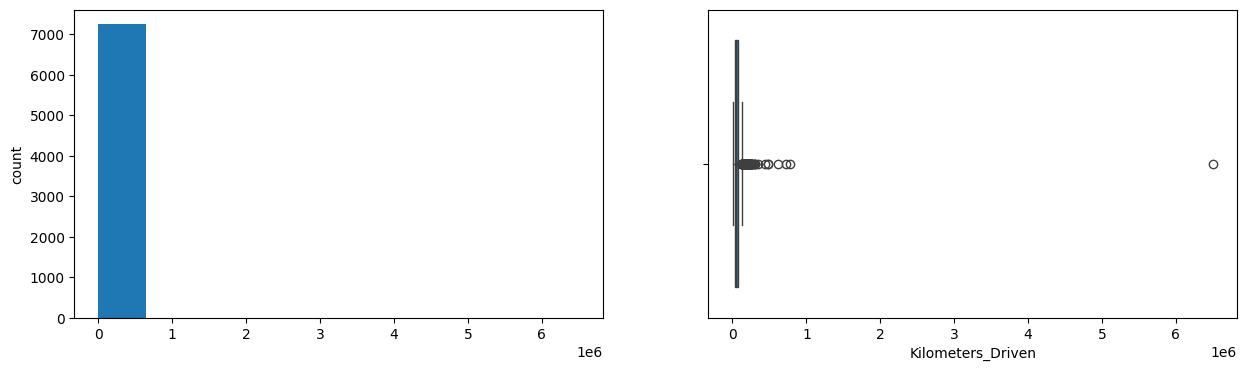

Kilometers_Driven_log


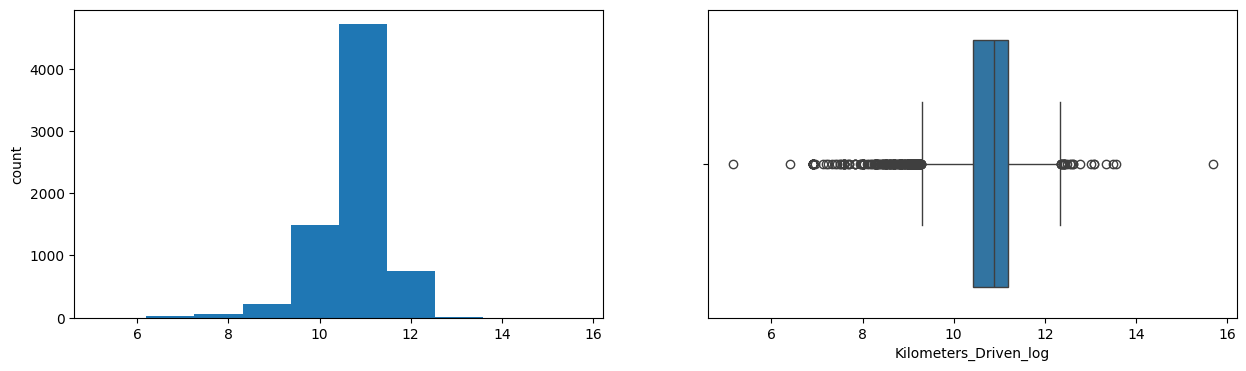

Price


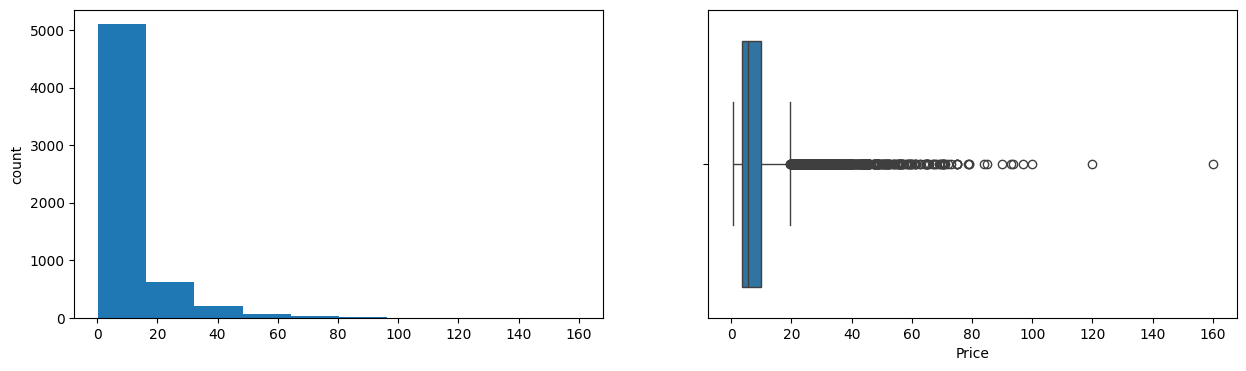

Price_log


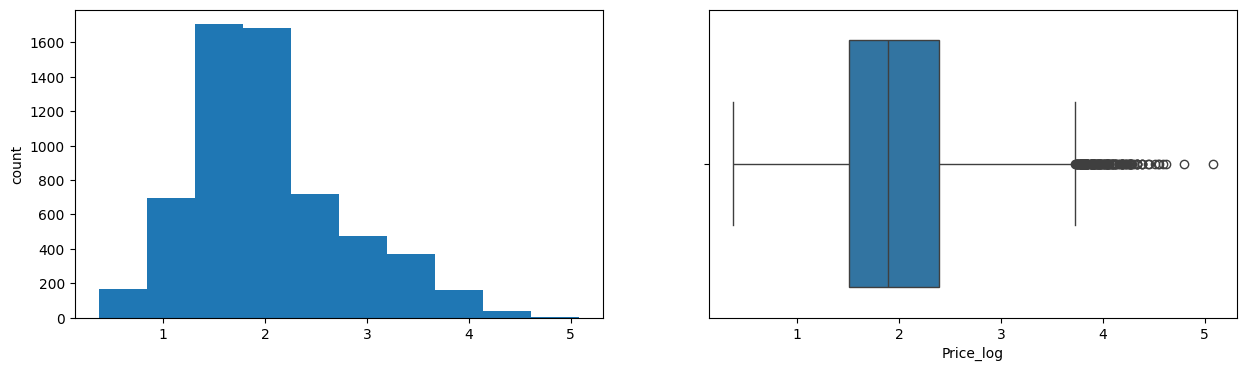

In [42]:
for col in ['Kilometers_Driven','Kilometers_Driven_log','Price','Price_log']:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
Двумерный анализ

Двумерный анализ помогает понять, как независимые
переменные связаны друг с другом, а также как независимые
переменные влияют на зависимые. Для числовых столбцов
двумерный анализ выполняется с помощью парных графиков
и диаграмм рассеяния. Для категориальных переменных
используются столбчатые диаграммы разных типов.

<Figure size 1300x1700 with 0 Axes>

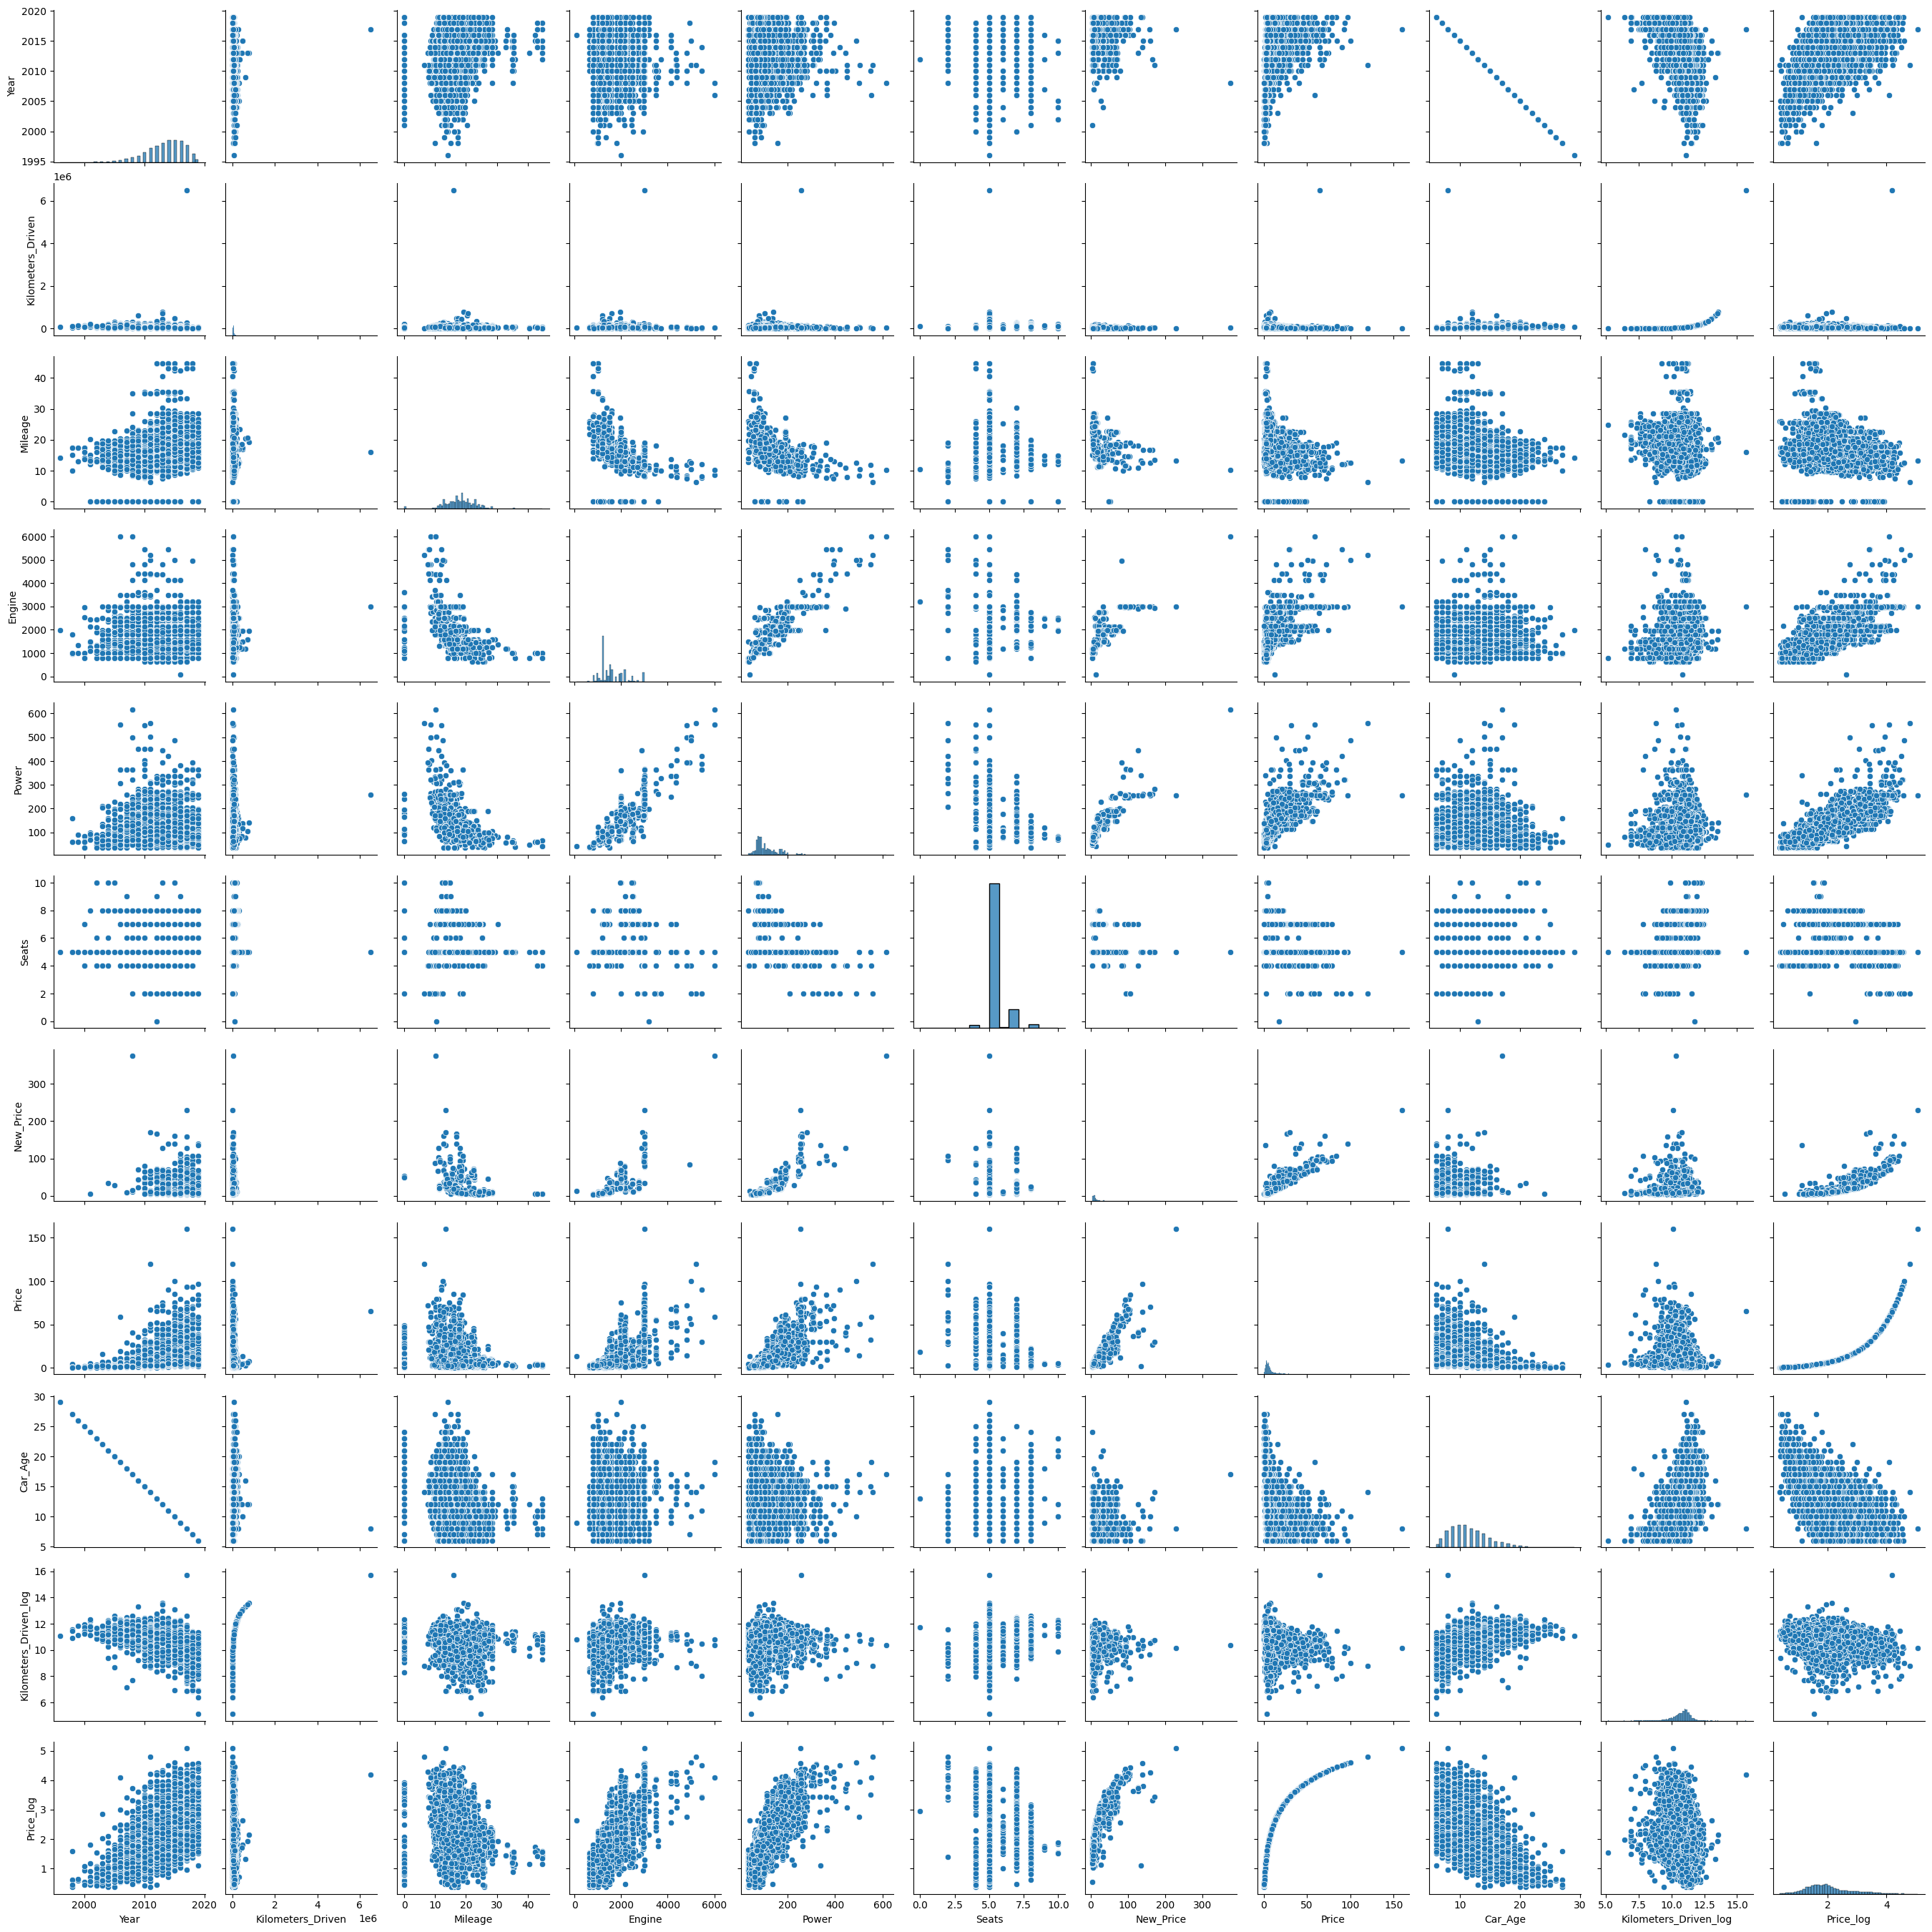

In [43]:
plt.figure(figsize=(13,17))
sns.pairplot(data)
plt.show()

In [ ]:
Сокращение столбцов

<Figure size 1300x1700 with 0 Axes>

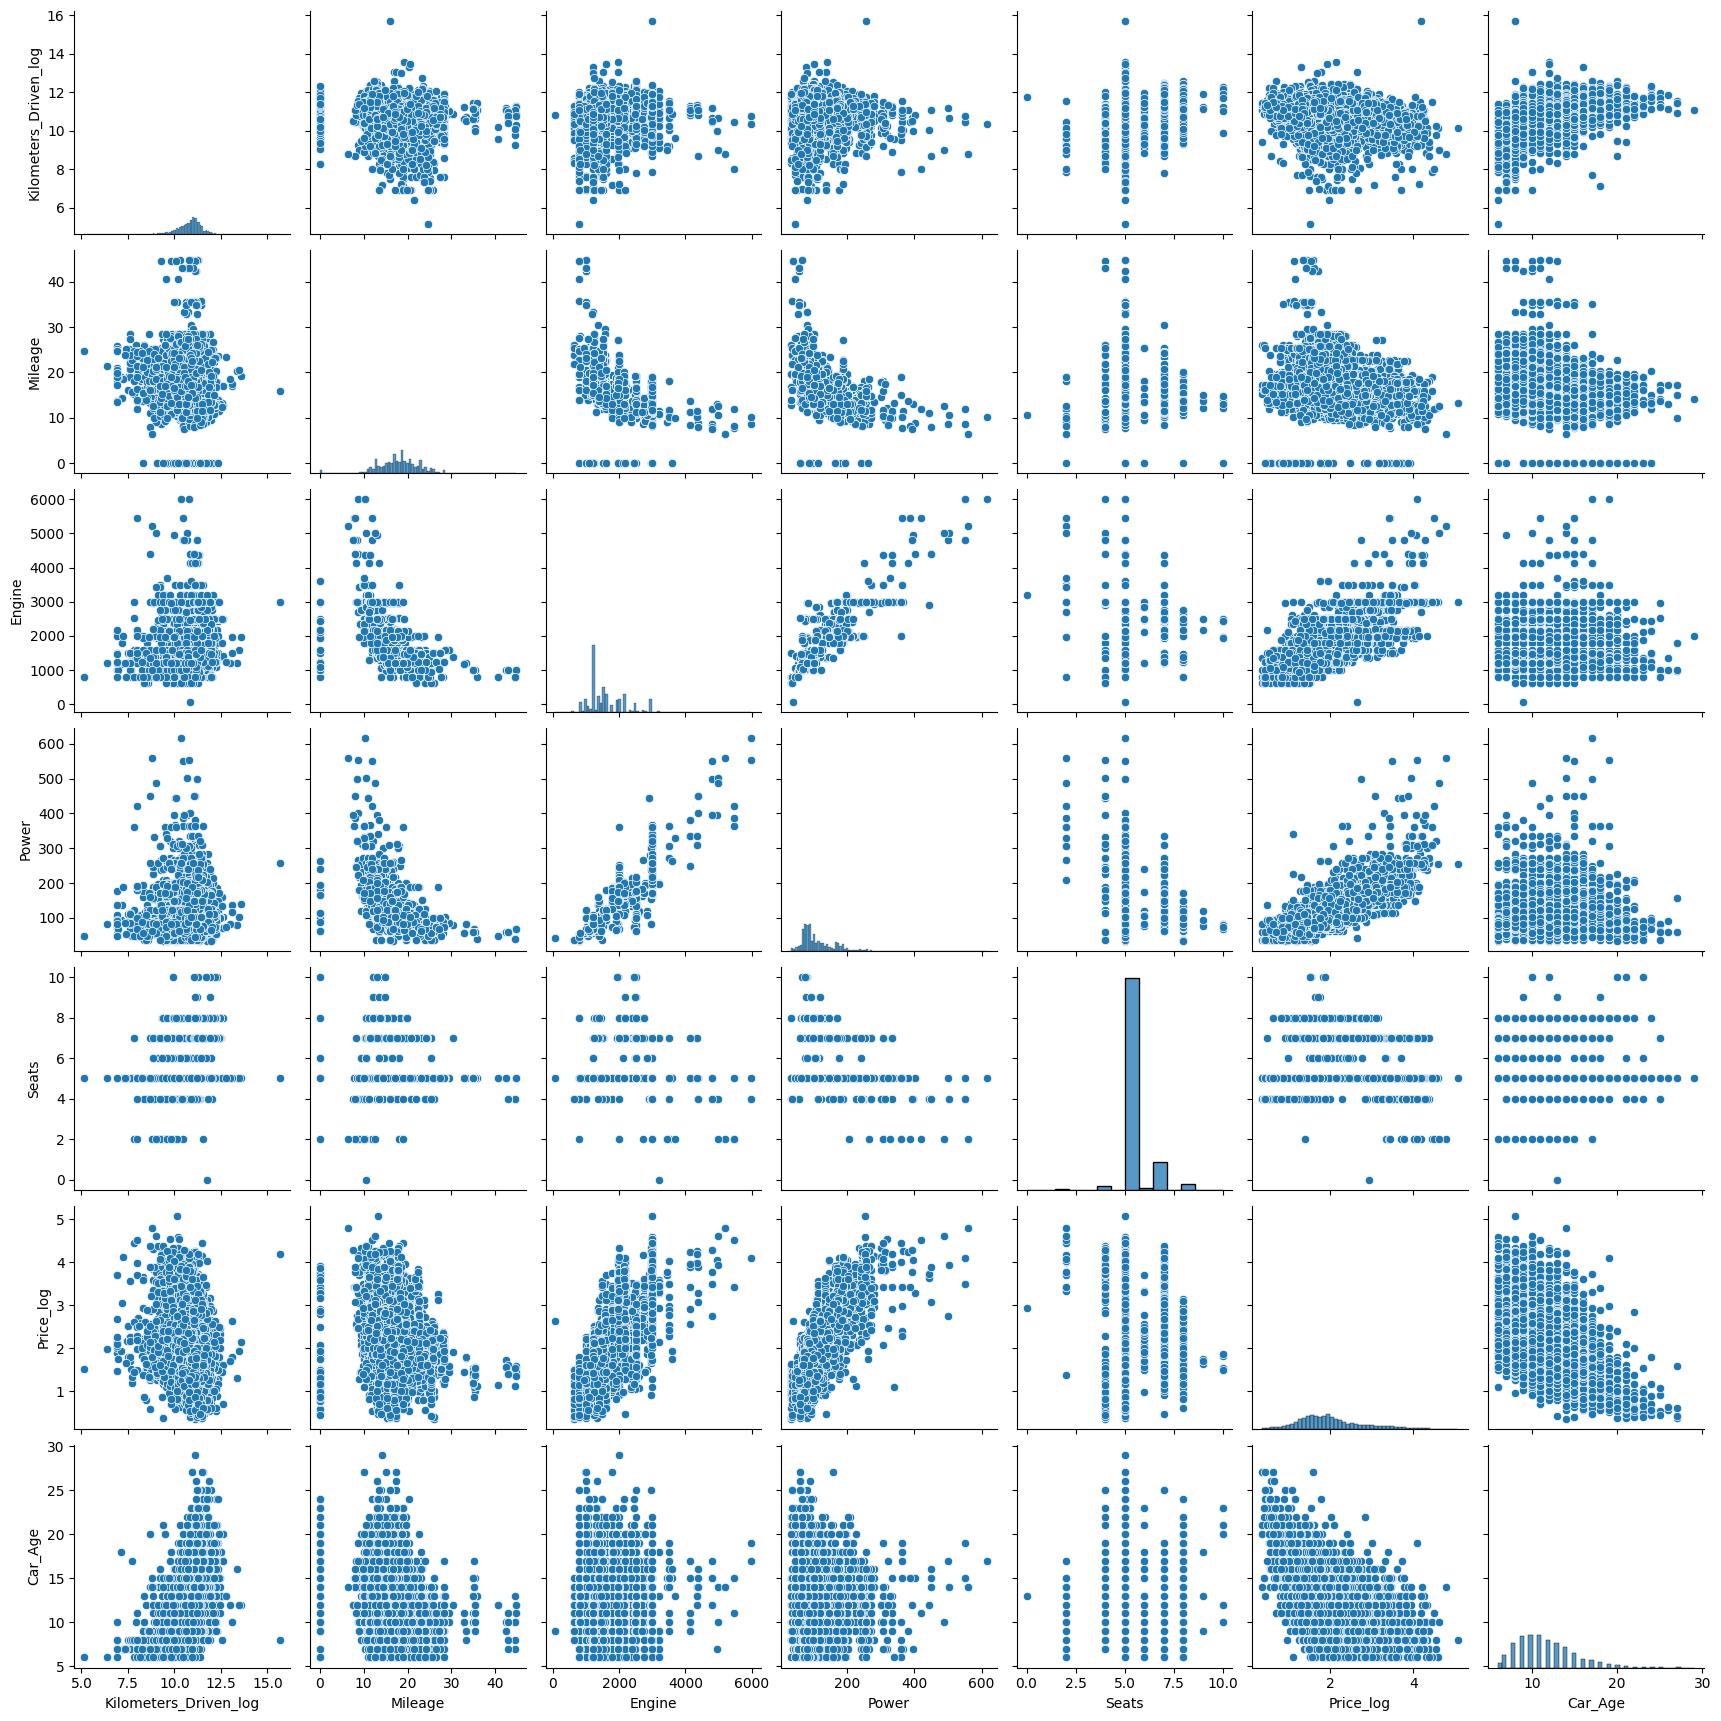

In [45]:
plt.figure(figsize=(13,17))
sns.pairplot(data[['Kilometers_Driven_log', 'Mileage', 'Engine', 'Power',
'Seats', 'Price_log', 'Car_Age']])
plt.show()

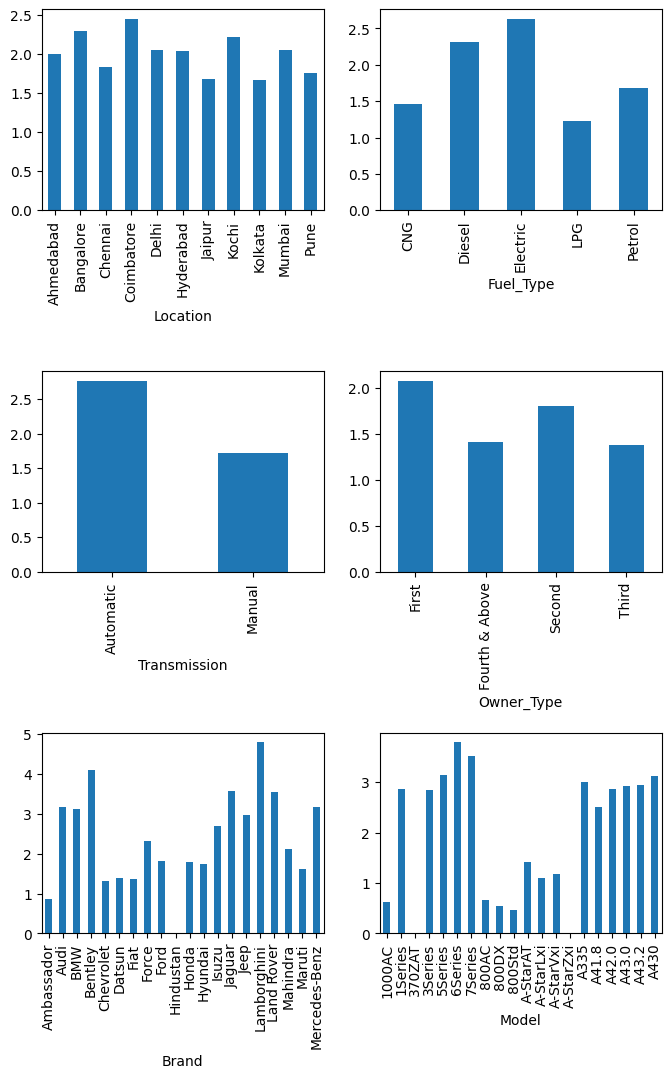

In [46]:
fig, axarr = plt.subplots(3, 2, figsize=(8, 12))
for i in range(len(cat_cols)):
 data.groupby(cat_cols[i])['Price_log'].mean().\
 head(20).plot.bar(ax=axarr[i//2][i%2]) # делим на 2 потому что 2 колонки
plt.subplots_adjust(hspace=0.8)
plt.show()

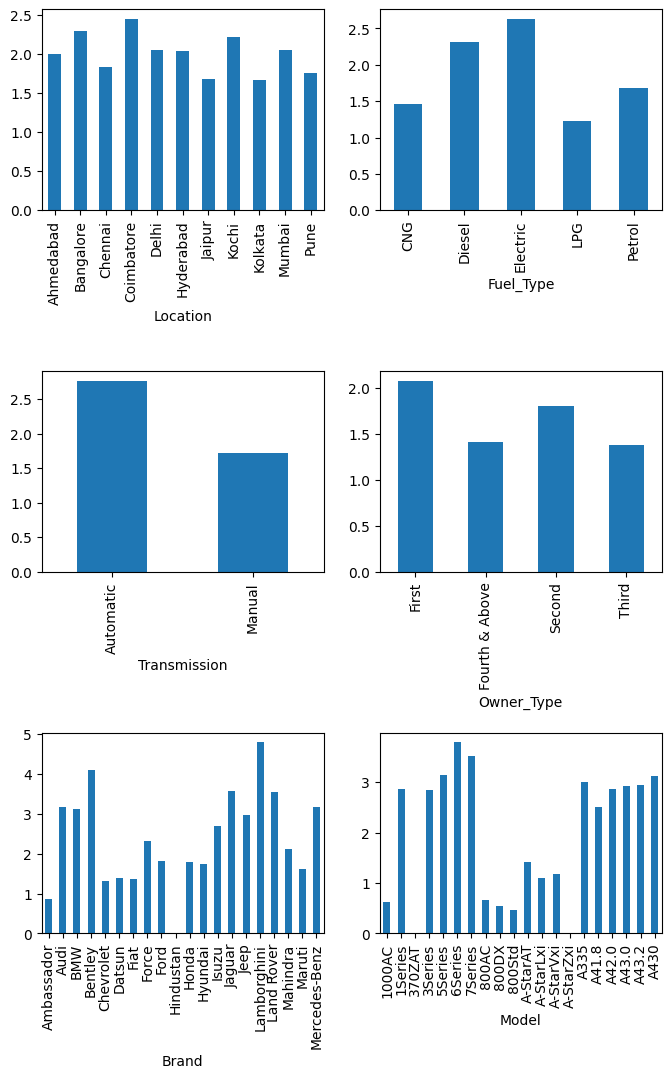

In [47]:
fig, axarr = plt.subplots(3, 2, figsize=(8, 12))
for i in range(len(cat_cols)):
    data.groupby(cat_cols[i])['Price_log'].mean().\
    head(20).plot.bar(ax=axarr[i//2][i%2])
plt.subplots_adjust(hspace=0.8)
plt.show()

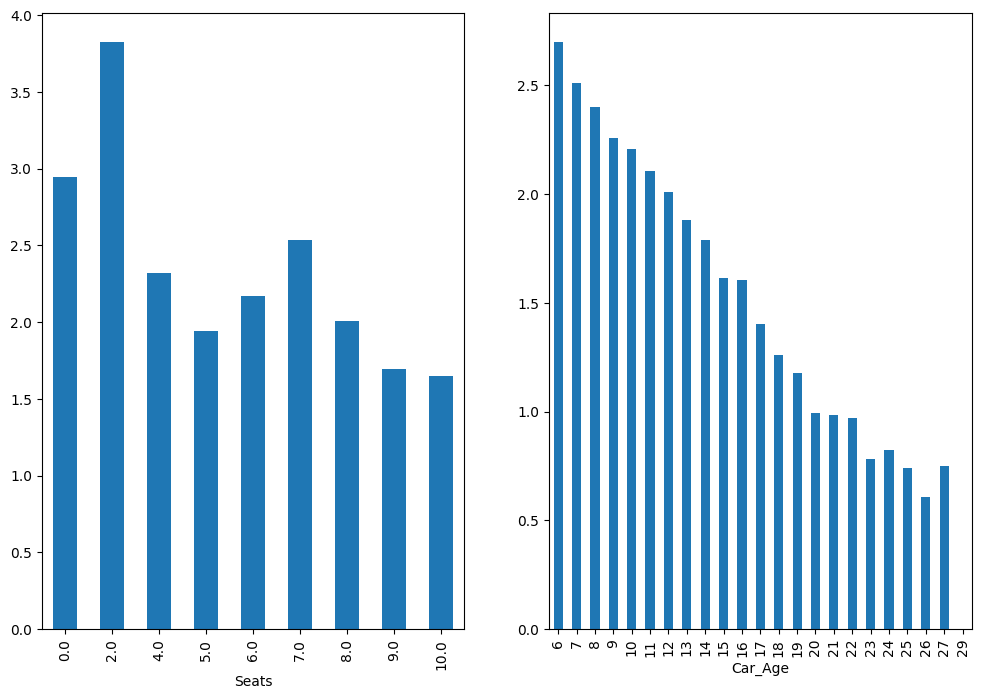

In [48]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
data.groupby('Seats')['Price_log'].mean().plot.bar(ax=axarr[0])
data.groupby('Car_Age')['Price_log'].mean().plot.bar(ax=axarr[1])
plt.show()

In [ ]:
Многомерный анализ
исследует более двух переменных для определения
взаимосвязей между ними и анализа закономерностей. Чаще
всего для этих целей используется тепловая карта,
показывающая корреляцию между переменными.

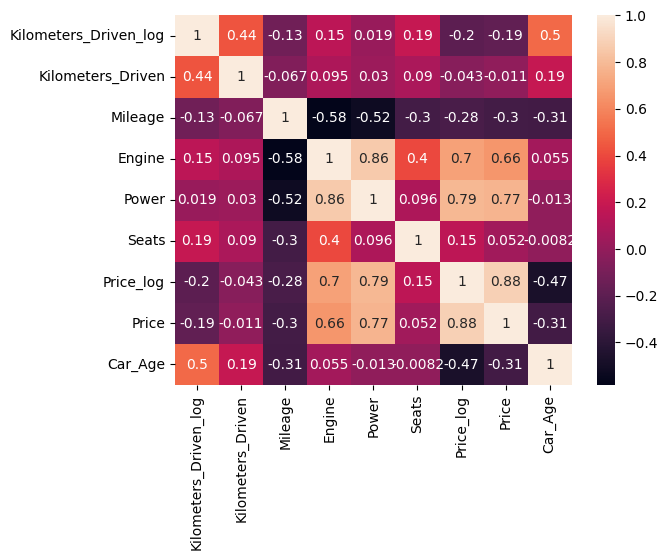

In [49]:
plt.figure()
sns.heatmap(data[['Kilometers_Driven_log', 'Kilometers_Driven', 'Mileage',
'Engine', 'Power', 'Seats', 'Price_log', 'Price', 'Car_Age']].corr(), annot =True)
plt.show()

In [50]:
#запись датафрейма в файл
data.to_pickle("cars.pkl")

In [ ]:
Способы заполнения пропущенных
значений

In [ ]:
Убрать нулевые значения

In [ ]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

In [ ]:
Заполнение средним арифметическим

In [ ]:
data['Mileage'] = data['Mileage'].fillna(value=np.mean(data['Mileage']))

In [ ]:
Заполнение пропущенных значений

In [ ]:
median_values = data.groupby(['Model', 'Brand'])['Seats'].transform('median')
data.loc[data['Seats'].isnull(), 'Seats'] = data['Seats'].fillna(median_values) # лучше заполнять не медианой а так, как сделали выше - посомтреть в интернете и заполнить конкретными значениями для каждой модели